In [3]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("/home/jayesh/Desktop/New Folder/creditcard.csv")

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.shape

(284807, 31)

In [10]:
data.isnull().sum()



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

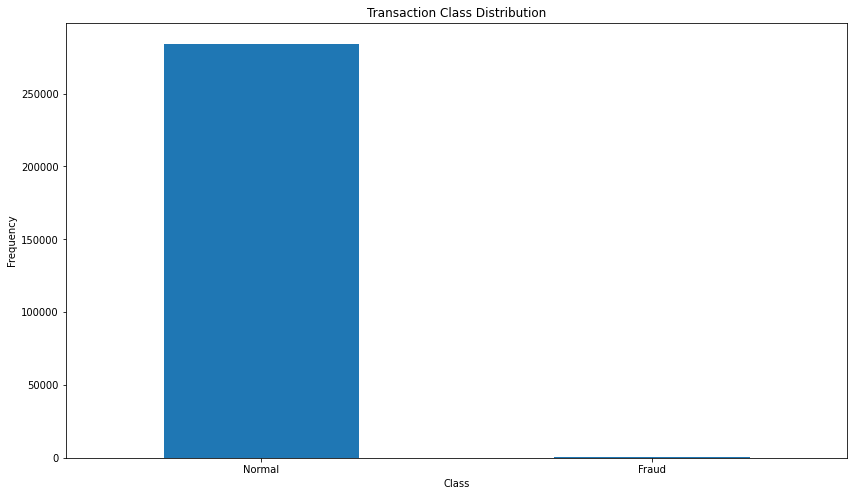

In [11]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [12]:

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [13]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


<AxesSubplot:xlabel='Amount'>

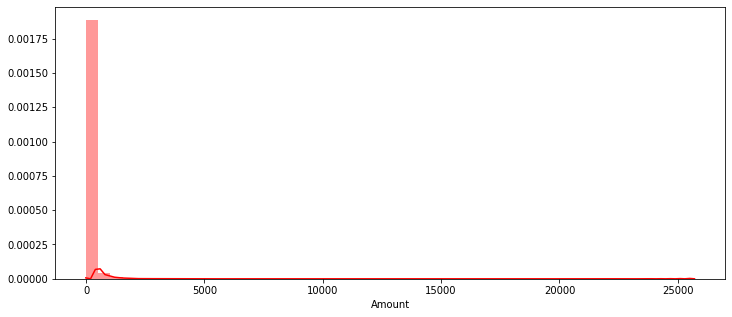

In [14]:
f, ax = plt.subplots(figsize=(12, 5))
sns.distplot(data['Amount'], color='r')

<AxesSubplot:xlabel='Time'>

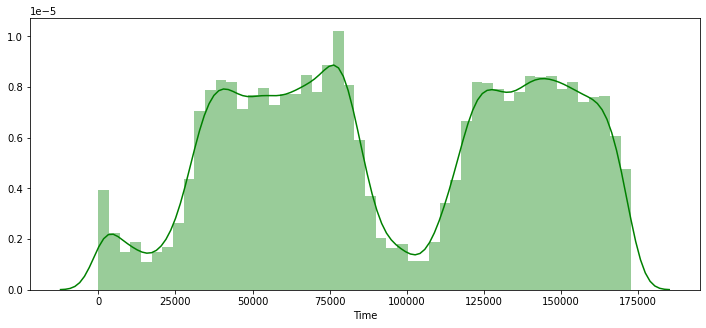

In [15]:
f, ax = plt.subplots(figsize=(12,5))
sns.distplot(data.Time, color='g')

In [17]:
print('Amount details of the fraudulent transaction') 
fraud.Amount.describe() 


Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
print('details of valid transaction') 
normal.Amount.describe() 


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

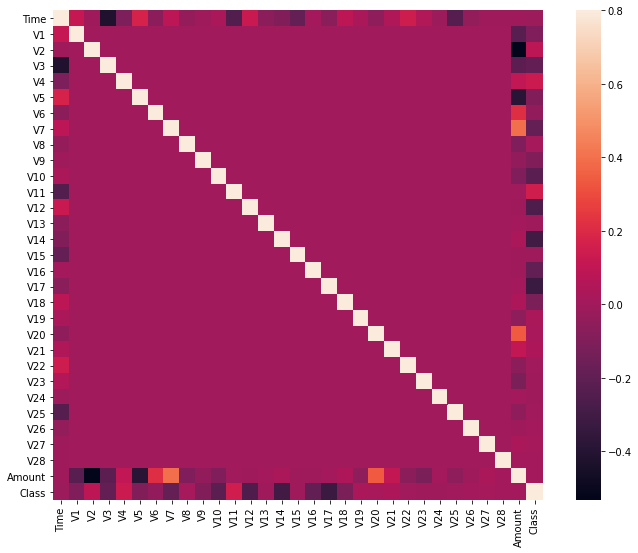

In [20]:
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [6]:

# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 


(284807, 30)
(284807,)


In [13]:
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42) 

In [8]:

# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 


In [24]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 

acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 

rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 


The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is0.8749276812909632


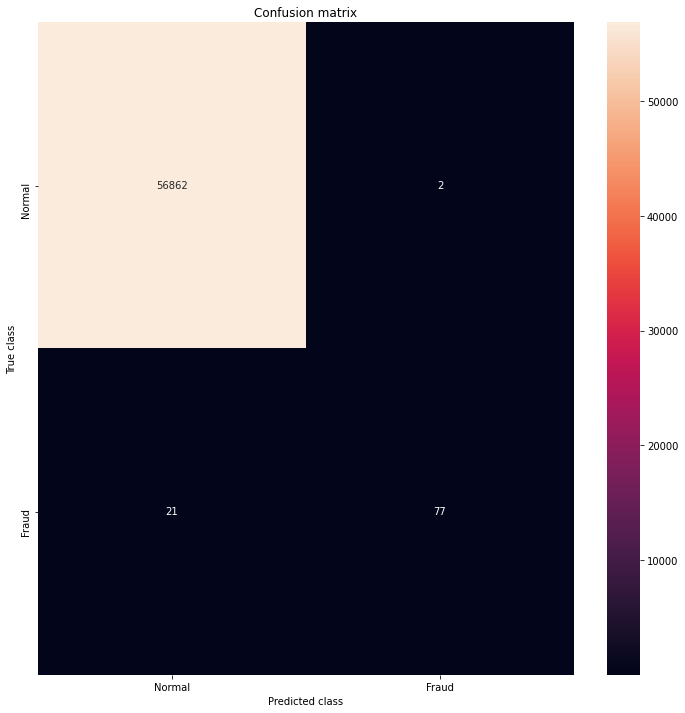

In [25]:
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
gb = GradientBoostingClassifier(n_estimators=100).fit(xTrain, yTrain)
gb.fit(xTrain, yTrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
gb.score (xTest,yTest),gb.score (xTrain,yTrain)

(0.9989466661985184, 0.9991836555553117)